# Classificadores
---
* Modelos que visam descrever ou prever um atributo especial chamdo classe.
* Descobrir ou descrver a classe de um fato
* É usado para preve uma fraude, descobrir a ual espécie um animal pertence, prever uma doença ou classificar um tipo de fungo.
* Geralmente a classe (aquilo que se quer prever) esta localizado como último atributo
## Tipos de Algorítimos:
* Árvores de decisão 
* Redes neurais artificiais e aprendizado profundo
* Máquina de Vetor de Suporte: cria vetores para classificar os dados.
* Método de Grupos
    * Florestas Aleatórias 
    * Boosting
* Aprendizado Baseado em Instâncias: classificador do vizinho mais próximo.
    * Nearest-neighbor
* Bayes: baseado ma teoria das probabilidades e que supóem que os atributos vão influenciar a classe de forma independente.
    * NaiveBayes
    * BayesNet
* Rules: estruturas do tipo if. 
    * OneR
    * Part

## Matriz de Confusão:
* Cruza os erros e aceros do modelo para identificar os Verdadeiros/Falsos Positivos e Verdadeiros/Falsos Negativos

## Generalização, Super Ajuste e Sub Ajuste
* O objetivo de todo classificador é criar modelos genéricos 
* O modelo super ajustado funciona bem com dados de treino, mas tem desempenho baixo diante dos dados de teste ou em produção
* O modelo sub ajustado não consegue boas taxas de previsão e não é capaz de capturar as características do negócio para o modelo.

## Causas de Super e Sub Ajuste
    * Dados não representativos
    * Dados não significativos(poucos)
    * Forma de treinamento
    * Classe rara
        * Transações de Fraude: a fraude é uma classe rara
        * O modelo pode ter dificuldade de aprender uma classe rara
        * Solução: estratidicação
    * Modelo incorreto

<img src="img/ajuste.PNG">

In [5]:
#install.packages('rhandsontable')

In [4]:
library(rhandsontable)

In [27]:
df = data.frame(adimplencia = c('sim',"não"),
               concede =c(as.integer(450),as.integer(250)),
               não_concede=c(as.integer(50),as.integer(250)),
               stringsAsFactors = FALSE)
df

adimplencia,concede,não_concede
<chr>,<int>,<int>
sim,450,50
não,250,250


In [30]:
rhandsontable(df, width = 550, height = 80) %>%
  hot_heatmap()
print("Falso positivo: 250 (25%) são maus pagadores, mas receberão empréstimo, resultando em prejuízo.")
print("Falso Negativo: 50 (5%) são bons pagadores, mas não receberão empréstimo, resultando em perca de negócios.")

HTML widgets cannot be represented in plain text (need html)

[1] "Falso positivo: 250 (25%) são maus pagadores, mas receberão empréstimo, resultando em prejuízo."
[1] "Falso Negativo: 50 (5%) são bons pagadores, mas não receberão empréstimo, resultando em perca de negócios."


## Como melhorar um modelo:
* Testando diferentes algorítimos
* Parametrizando algorítimos (hiper parâmetros)
* Selecionando e tratando dados
* Seleção/engenharia de atributos

## Maldição da dimensionalidade
* A inclusão de muitos (ou mais) atributos em um modelo degradam sua performance.
* Se existe muitos atributos, deve-se selecionar os mais relevantes, seja manualmente ou automaticamente.

# Arvores de Decisão
---

## Bibliotecas

In [3]:
library(rpart)
library(forecast)

## Dataset: Iris

In [6]:
head(iris)
dim(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


[1] 150   5

## Criando o modelo prevendo Sepal.Length
---
* O que faz esta arvore de decisão ser uma regressão é a variável numérica Sepal.Length
* Se for criado para prever uma variável categórica, resultará em um classificador

In [8]:
model = rpart(Sepal.Length ~ Sepal.Width + Petal.Length + Petal.Width + Species, data=iris)
model
summary(model)

n= 150 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 150 102.1683000 5.843333  
   2) Petal.Length< 4.25 73  13.1391800 5.179452  
     4) Petal.Length< 3.4 53   6.1083020 5.005660  
       8) Sepal.Width< 3.25 20   1.0855000 4.735000 *
       9) Sepal.Width>=3.25 33   2.6696970 5.169697 *
     5) Petal.Length>=3.4 20   1.1880000 5.640000 *
   3) Petal.Length>=4.25 77  26.3527300 6.472727  
     6) Petal.Length< 6.05 68  13.4923500 6.326471  
      12) Petal.Length< 5.15 43   8.2576740 6.165116  
        24) Sepal.Width< 3.05 33   5.2218180 6.054545 *
        25) Sepal.Width>=3.05 10   1.3010000 6.530000 *
      13) Petal.Length>=5.15 25   2.1896000 6.604000 *
     7) Petal.Length>=6.05 9   0.4155556 7.577778 *

Call:
rpart(formula = Sepal.Length ~ Sepal.Width + Petal.Length + Petal.Width + 
    Species, data = iris)
  n= 150 

          CP nsplit rel error    xerror       xstd
1 0.61346237      0 1.0000000 1.0118384 0.09770520
2 0.12180701      1 0.3865376 0.3906173 0.04820453
3 0.05718872      2 0.2647306 0.3047802 0.03173716
4 0.02980452      3 0.2075419 0.2555336 0.03058901
5 0.02303165      4 0.1777374 0.2416193 0.02961799
6 0.01698037      5 0.1547057 0.2347226 0.02940271
7 0.01000000      6 0.1377254 0.2288162 0.02753053

Variable importance
Petal.Length  Petal.Width      Species  Sepal.Width 
          37           27           22           15 

Node number 1: 150 observations,    complexity param=0.6134624
  mean=5.843333, MSE=0.6811222 
  left son=2 (73 obs) right son=3 (77 obs)
  Primary splits:
      Petal.Length < 4.25 to the left,  improve=0.61346240, (0 missing)
      Petal.Width  < 1.15 to the left,  improve=0.58031680, (0 missing)
      Species      splits as  LRR,      improv

## Visualização

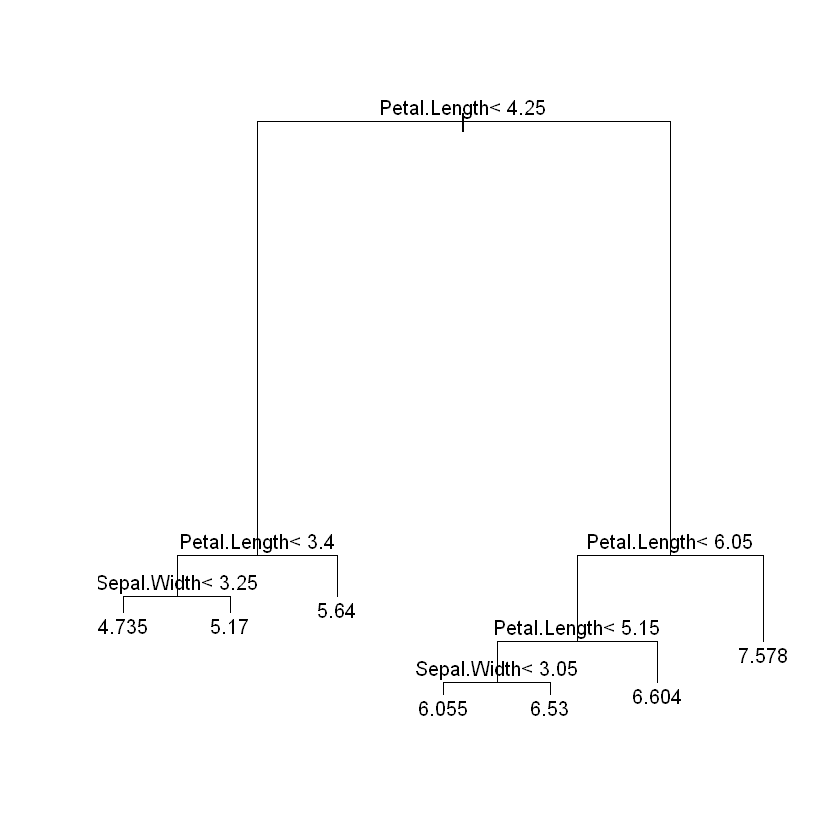

In [11]:
plot(model)
text(model)

## Previsão

In [12]:
predict = predict(model, iris)
head(predict)

1        2        3        4        5        6 
5.169697 4.735000 4.735000 4.735000 5.169697 5.169697

## Comparando com os dados reais

In [15]:
comp = cbind(predict, iris$Sepal.Length, predict - iris$Sepal.Length)
head(comp)

,predict,,
1,5.169697,5.1,0.06969697
2,4.735000,4.9,-0.16500000
3,4.735000,4.7,0.03500000
4,4.735000,4.6,0.13500000
5,5.169697,5.0,0.16969697
6,5.169697,5.4,-0.23030303


## Métricas de erros do modelo

In [16]:
accuracy(predict, iris$Sepal.Length)

,ME,RMSE,MAE,MPE,MAPE
Test set,6.335601e-16,0.3062806,0.2425701,-0.2838496,4.219833
